In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
print('Размерность данных', df.shape)

Размерность данных (12330, 18)


In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
print('пропущенные значения:')
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
pd.DataFrame({'Количество пропусков' : missing_data, 'Процент пропусков' : missing_percent.round(2)})

пропущенные значения:


,Количество пропусков,Процент пропусков
Administrative,0,0.0
Administrative_Duration,0,0.0
Informational,0,0.0
Informational_Duration,0,0.0
ProductRelated,0,0.0
ProductRelated_Duration,0,0.0
BounceRates,0,0.0
ExitRates,0,0.0
PageValues,0,0.0
SpecialDay,0,0.0


In [6]:
# условная вероятность 
# найдем вероятность совершенной покупки поситителем, который вернулся за покупкой после просмотра
def conditional_prob(df, condition_col, condition_val, target_col, target_val=True):
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

prob_revenue_return = conditional_prob(df, 'VisitorType', 'Returning_Visitor', 'Revenue')
print(f"Вероятность покупки для возвращающихся посетителей\n P(Revenue | Returning_Visitor) = {prob_revenue_return:.3f}")

print("\nПо выходным дням:")
for weekend in [True, False]:
    prob = conditional_prob(df, 'Weekend', weekend, 'Revenue')
    print(f" P(Revenue | Weekend={weekend}) = {prob:.3f}")

Вероятность покупки для возвращающихся посетителей
 P(Revenue | Returning_Visitor) = 0.139

По выходным дням:
 P(Revenue | Weekend=True) = 0.174
 P(Revenue | Weekend=False) = 0.149


In [7]:
# полная вероятность покупки
print("ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:")
print("P(Revenue) = Σ P(Revenue | VisitorType=i) * P(VisitorType=i)")
print("=" * 50)

total_prob = 0
prob_details = []

for visitor_type in df['VisitorType'].unique():
    P_vtype = (df['VisitorType'] == visitor_type).mean()
    P_revenue_given_vtype = conditional_prob(df, 'VisitorType', visitor_type, 'Revenue')
    
    contribution = P_revenue_given_vtype * P_vtype
    total_prob += contribution
    
    prob_details.append({
        'Visitor Type': visitor_type,
        'P(Type)': P_vtype,
        'P(Revenue|Type)': P_revenue_given_vtype,
        'Вклад': contribution
    })


prob_df = pd.DataFrame(prob_details)
print(prob_df.round(3))
print(f"\nОбщая вероятность покупки, рассчитанная по формуле полной вероятности: {total_prob:.3f}")
print(f"Общая вероятность покупки, рассчитанная напрямую: {df['Revenue'].mean():.3f}")

ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:
P(Revenue) = Σ P(Revenue | VisitorType=i) * P(VisitorType=i)
        Visitor Type  P(Type)  P(Revenue|Type)  Вклад
0  Returning_Visitor    0.856            0.139  0.119
1        New_Visitor    0.137            0.249  0.034
2              Other    0.007            0.188  0.001

Общая вероятность покупки, рассчитанная по формуле полной вероятности: 0.155
Общая вероятность покупки, рассчитанная напрямую: 0.155


In [8]:
# Мы видим посетителя, который совершил покупку. 
# Какова вероятность того, что он является новым посетителем P(New_Visitor | Revenue)
print("ТЕОРЕМА БАЙЕСА:")
print("P(New_Visitor | Revenue) = [P(Revenue | New_Visitor) * P(New_Visitor)] / P(Revenue)")
print("=" * 50)

bayes_results = []

P_revenue = df['Revenue'].mean()

for visitor_type in df['VisitorType'].unique():

    P_prior = (df['VisitorType'] == visitor_type).mean()

    P_likelihood = conditional_prob(df, 'VisitorType', visitor_type, 'Revenue')
    

    P_posterior = (P_likelihood * P_prior) / P_revenue
    
    bayes_results.append({
        'Visitor Type': visitor_type,
        'P(Type)': P_prior,
        'P(Revenue|Type)': P_likelihood,
        'P(Type|Revenue)': P_posterior
    })

bayes_df = pd.DataFrame(bayes_results)
print(bayes_df.round(3))

ТЕОРЕМА БАЙЕСА:
P(New_Visitor | Revenue) = [P(Revenue | New_Visitor) * P(New_Visitor)] / P(Revenue)
        Visitor Type  P(Type)  P(Revenue|Type)  P(Type|Revenue)
0  Returning_Visitor    0.856            0.139            0.770
1        New_Visitor    0.137            0.249            0.221
2              Other    0.007            0.188            0.008


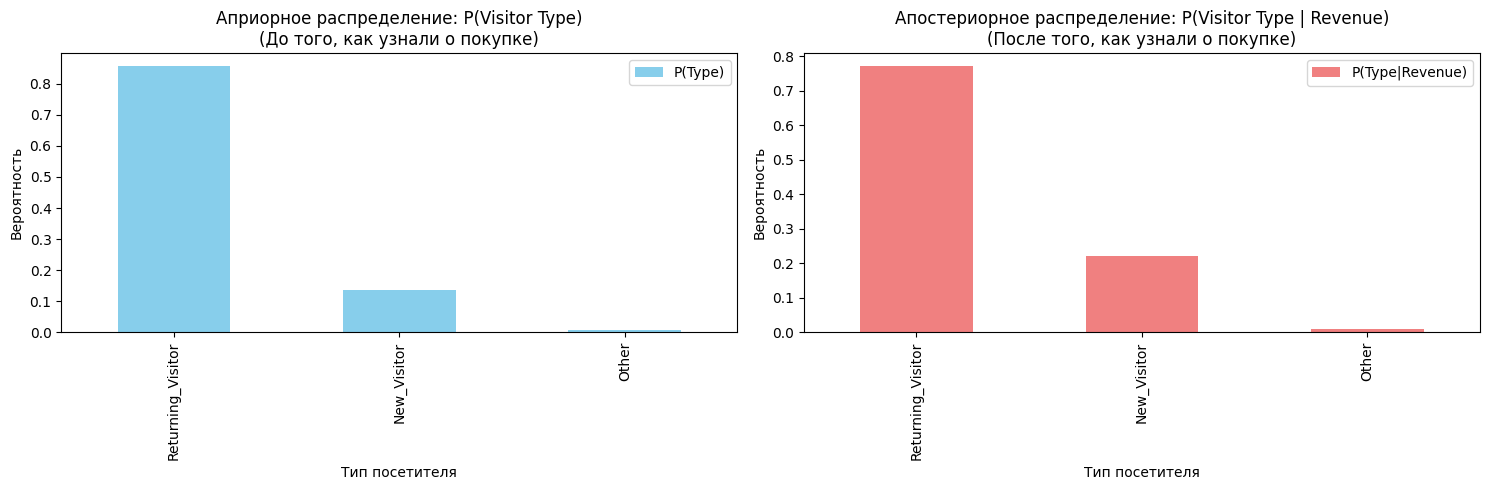

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Априорное распределение
bayes_df.plot(x='Visitor Type', y='P(Type)', kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Априорное распределение: P(Visitor Type)\n(До того, как узнали о покупке)')
ax1.set_ylabel('Вероятность')
ax1.set_xlabel('Тип посетителя')

# Апостериорное распределение
bayes_df.plot(x='Visitor Type', y='P(Type|Revenue)', kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Апостериорное распределение: P(Visitor Type | Revenue)\n(После того, как узнали о покупке)')
ax2.set_ylabel('Вероятность')
ax2.set_xlabel('Тип посетителя')

plt.tight_layout()
plt.show()

# Анализ 
1. Возвращающиеся посетители имеют значительно более высокую вероятность покупки

2. Выходные дни показывают немного более высокую конверсию

3. Теорема Байеса показывает, что хотя новые посетители имеют низкую индивидуальную конверсию, они составляют заметную долю среди всех покупателей